# Ford Gobike Tripdata Analysis

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## loading dataset

In [2]:
df=pd.read_csv('fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of the dataset?

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.     
> Datasets columns    
    * duration_sec: duration of trip in seconds.    
    * start_time: Start time of the trip.     
    * end_time: End time of the trip.     
    * start_station_id, start_station_name, start_station_latitude, start_station_longitude: Start station details.    
    * end_station_id, end_station_name, end_station_latitude, end_station_longitude: End station details.     
    * bike_id: The ID of the rented bike.    
    * user_type: type of the user ('Customer' or 'Subscriber').     
    * member_birth_year, member_gender: Details of user.    
    * bike_share_for_all_trip : Wether the bike was shared for all the trip or not.      


### What is/are the main feature(s) of interest in the dataset?

> the average time of trips, most popular station, user classifications by age, gender, and user type.

### What features in the dataset  will help support the investigation into the feature(s) of interest?

> duration_sec,start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, and member_birth_year

## Data wrangling and cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Check and clean missing data 

def cast_date(x):
    '''this function switchs data from strings to datetime type'''
    return pd.to_datetime(x)
def sec_to_min(x):
    '''this function switchs data from Seconds into minutes'''
    return x/60
def get_age(born,current):
    return current - born

    
print(f'Shape before droping nulls: {df.shape}' )
print(f'Is there any records with missing data? {df.isna().any().any()}' )
# drop nulls
df.dropna(inplace=True)
print(f'Is there any records with missing data still? {df.isna().any().any()}')
print(f'Shape After droping nulls: {df.shape}')
print(f'Is there any duplicated records? {df.duplicated().any()}','\n')

# fix data types
df['start_time']= cast_date(df['start_time'])
df['end_time']= cast_date(df['end_time'])
df['start_station_id']=df['start_station_id'].astype(int)
df['end_station_id']=df['end_station_id'].astype(int)

# create new column for duration in minutes and user age
current_year=df['end_time'].max().year

try:
    df.insert(1,'duration_min',sec_to_min(df['duration_sec']) )
    df.insert(14,'user_age',get_age(df['member_birth_year'],current_year).astype(int) )
    
except:
    pass

df.info()


Shape before droping nulls: (183412, 16)
Is there any records with missing data? True
Is there any records with missing data still? False
Shape After droping nulls: (174952, 16)
Is there any duplicated records? False 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   duration_min             174952 non-null  float64       
 2   start_time               174952 non-null  datetime64[ns]
 3   end_time                 174952 non-null  datetime64[ns]
 4   start_station_id         174952 non-null  int64         
 5   start_station_name       174952 non-null  object        
 6   start_station_latitude   174952 non-null  float64       
 7   start_station_longitude  174952 non-null  float64       
 8   end_station_id           174952 non-null  int

## Univariate Exploration


In [5]:
## histogram of a variable
def hist_var(var,bin_wid,align='mid'):
    min_1=var.min()
    max_1=var.max()
    bins=np.arange(min_1, max_1+bin_wid ,bin_wid)
    if align:
        plt.hist(var,bins=bins,align=align)
    else:
        plt.hist(var,bins=bins)
    return bins

### Renting duration

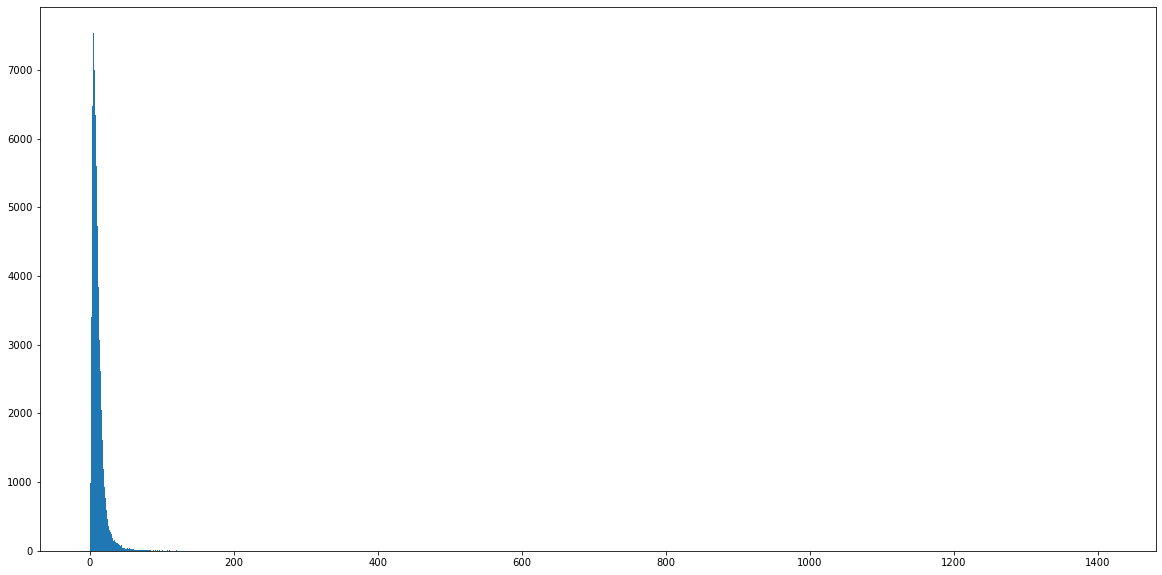

90% of data falls under 19.35 


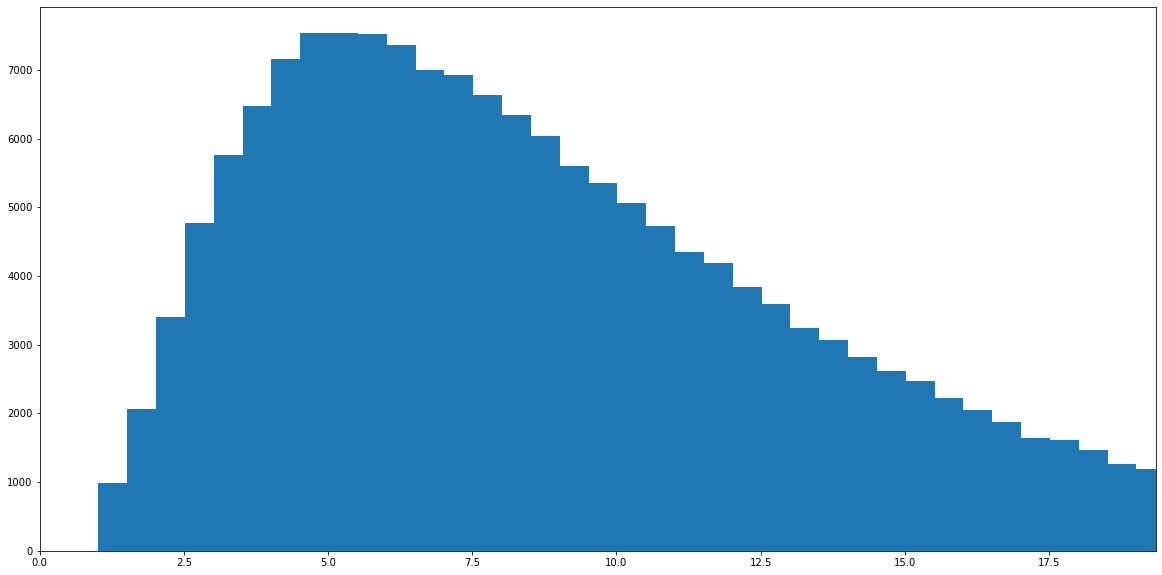

In [6]:
# set default plot size
plt.rcParams['figure.figsize'] = (20, 10)
## histogram of the renting minutes
hist_var(df['duration_min'],0.5)
plt.show()
print(f'90% of data falls under {df.duration_min.quantile(0.90)} ')

# we can see that 90% of the data have duration less than 20 mins

hist_var(df['duration_min'],0.5)
plt.xlim(0,df['duration_min'].quantile(0.90));


#### The distribution of reting duration in minutes appears to be right skewed and we have a some out liers in the data that might be some error or lost bikes or a very long rent. :D

### Renting start time

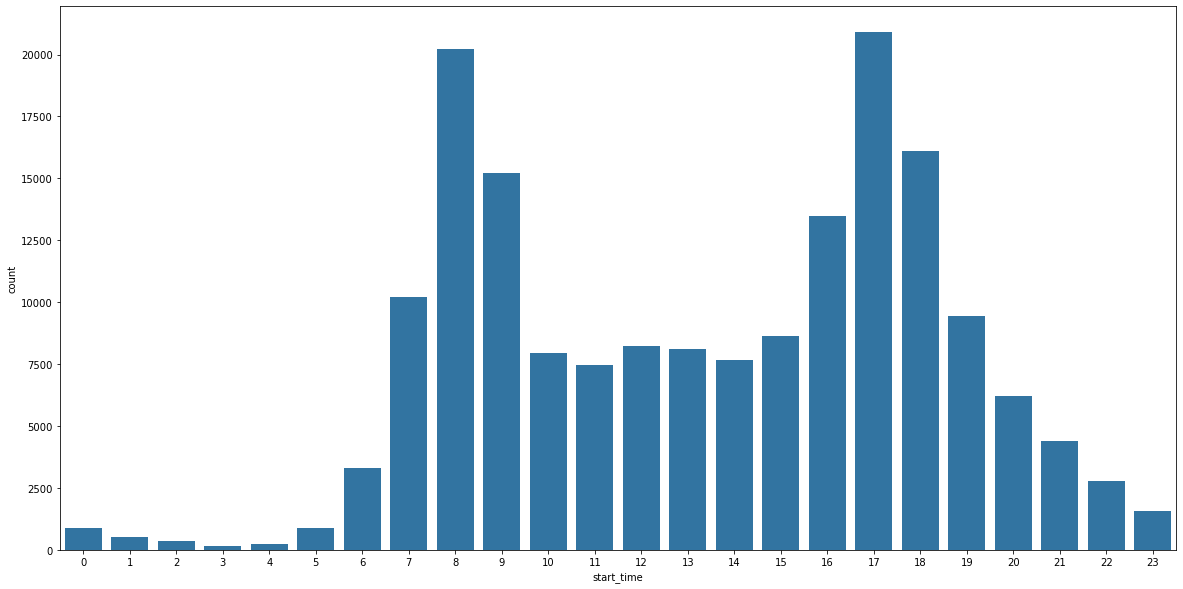

In [7]:
co=sns.color_palette()[0]
sns.countplot(data=df, x=df['start_time'].apply(lambda x:x.hour),  color=co);

#### The distributions is bimodal with two peaks at 8 and 17 and it also show a drastic drops in renting from 0 to 6 which is very predicted

### start station

number of unique stations: 329


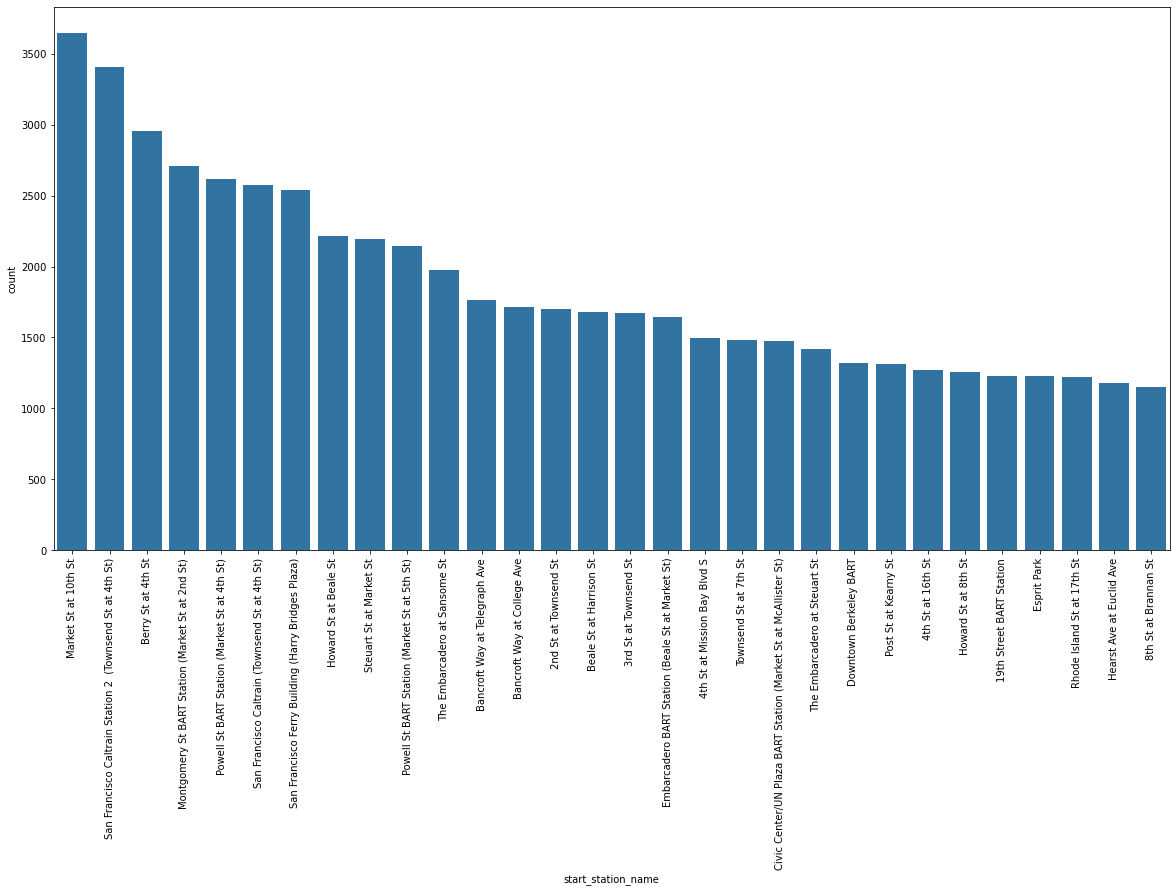

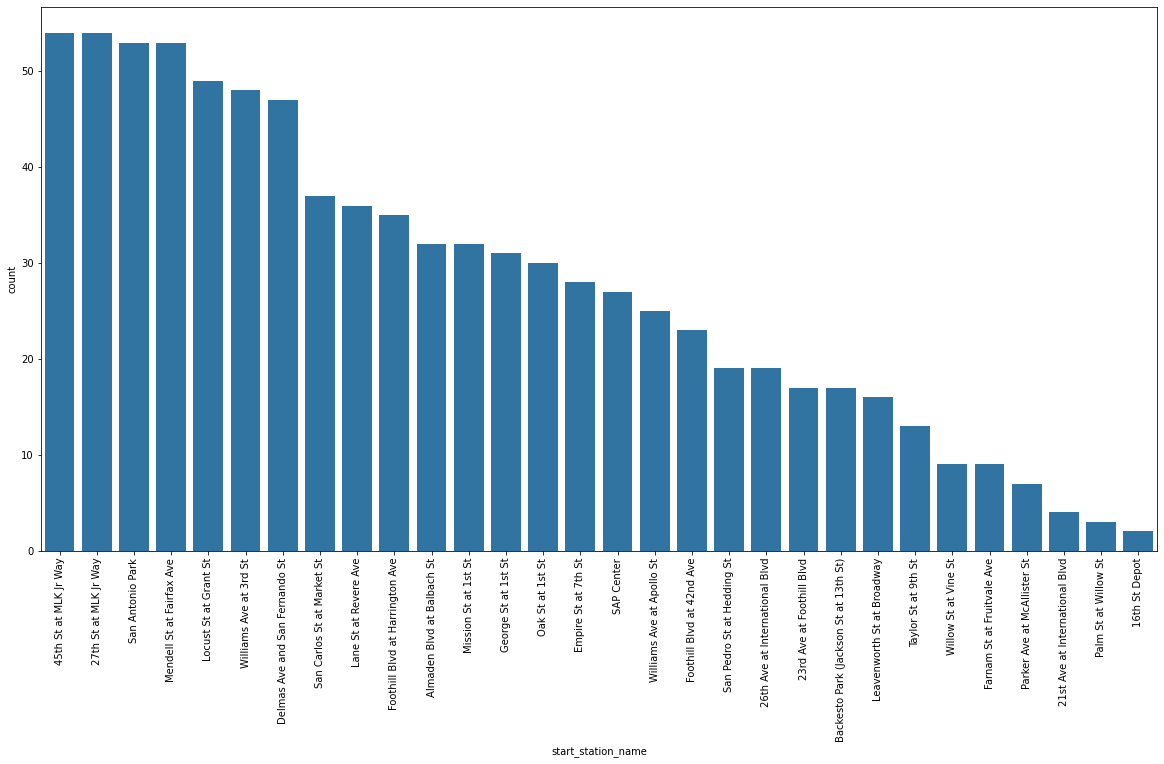

In [8]:
# number of unique stations
print(f"number of unique stations: {len(df['start_station_name'].unique())}")
# we can see there is a lot of staions to plot so let plot the most and least popular
least_pop_stations=df.groupby('start_station_name').size().sort_values()[:30]
most_pop_stations=df.groupby('start_station_name').size().sort_values()[-30:]
df_pop=df[df['start_station_name'].isin(most_pop_stations.index)]
df_unpop=df[df['start_station_name'].isin(least_pop_stations.index)]
co=sns.color_palette()[0]
sns.countplot(data=df_pop,x='start_station_name',order=most_pop_stations.index[::-1], color=co);
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=df_unpop,x='start_station_name',order=least_pop_stations.index[::-1],  color=co);
plt.xticks(rotation=90);


#### The most popular start station is 'market St at 10th St' and the least popular is '16th St Depot'

### end station

number of unique stations: 329


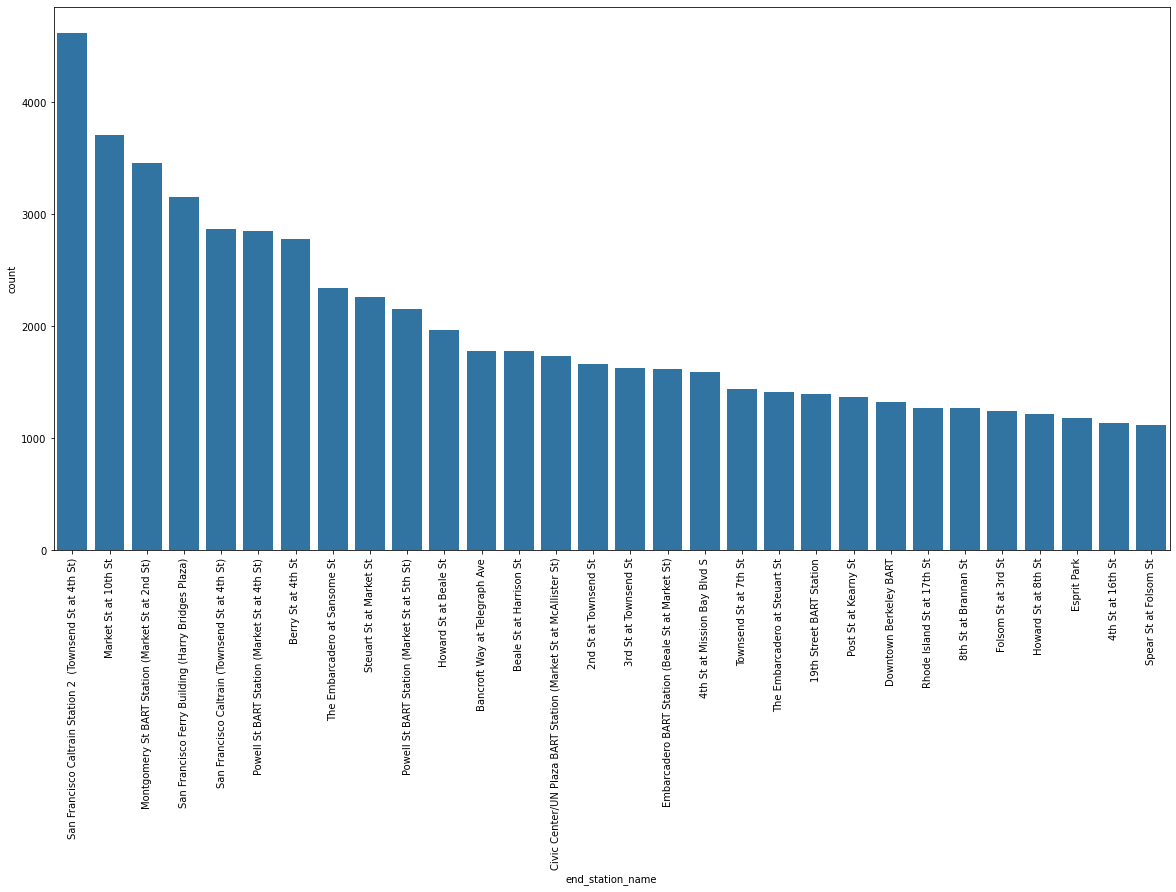

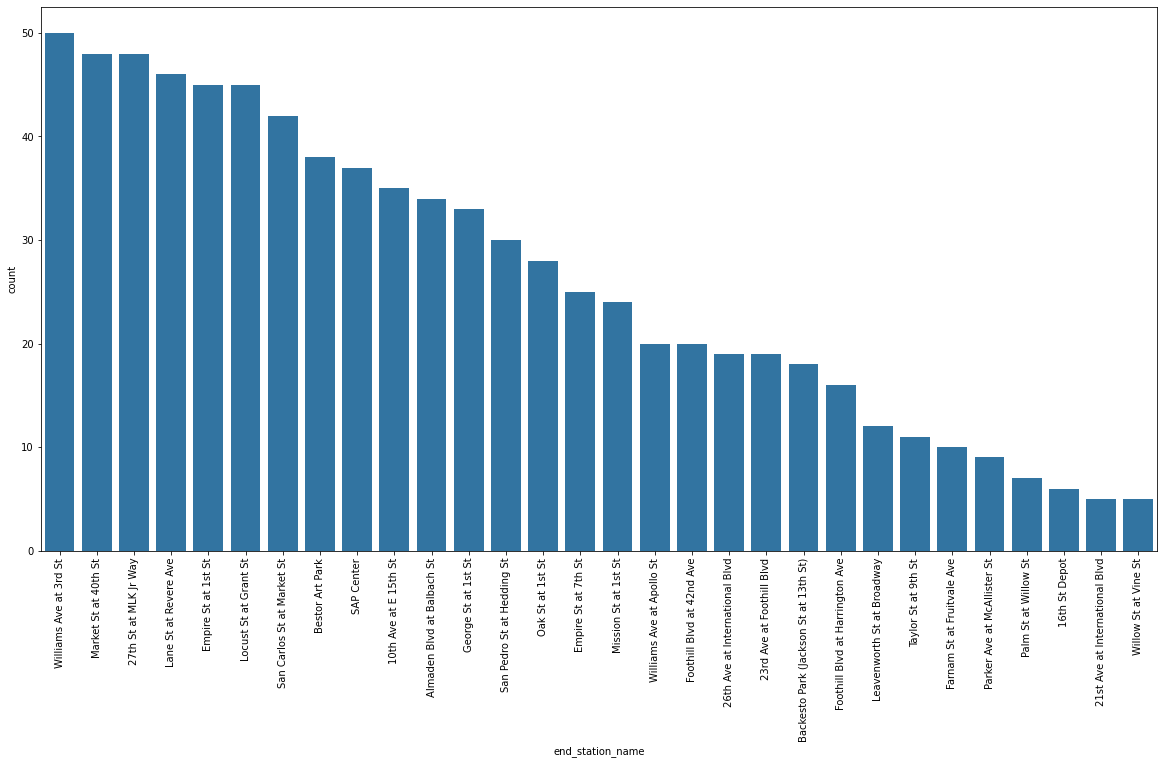

In [9]:
# number of unique stations
print(f"number of unique stations: {len(df['end_station_name'].unique())}")
# we can see there is a lot of staions to plot so let plot the most and least popular
least_pop_stations=df.groupby('end_station_name').size().sort_values()[:30]
most_pop_stations=df.groupby('end_station_name').size().sort_values()[-30:]
df_pop=df[df['end_station_name'].isin(most_pop_stations.index)]
df_unpop=df[df['end_station_name'].isin(least_pop_stations.index)]
co=sns.color_palette()[0]
sns.countplot(data=df_pop,x='end_station_name',order=most_pop_stations.index[::-1], color=co);
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=df_unpop,x='end_station_name',order=least_pop_stations.index[::-1],  color=co);
plt.xticks(rotation=90);

### The most popular end station is 'Townsend St at 4th St' the least popular is 'Williw St at Vine St'

### Gender

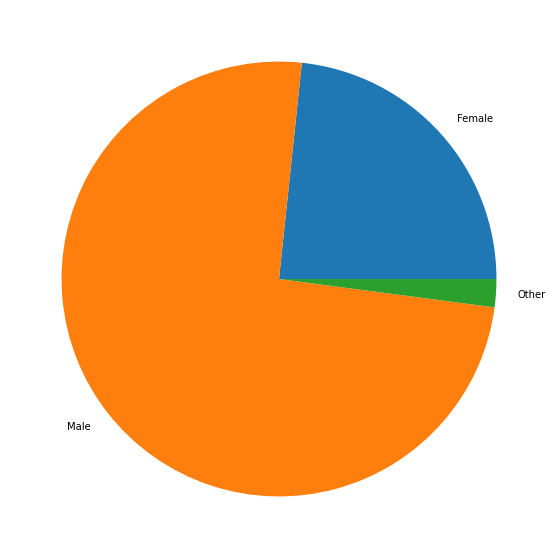

In [10]:
x=df.groupby('member_gender').size()
plt.pie(x,labels=x.index);

#### Most of the users are males

### User type

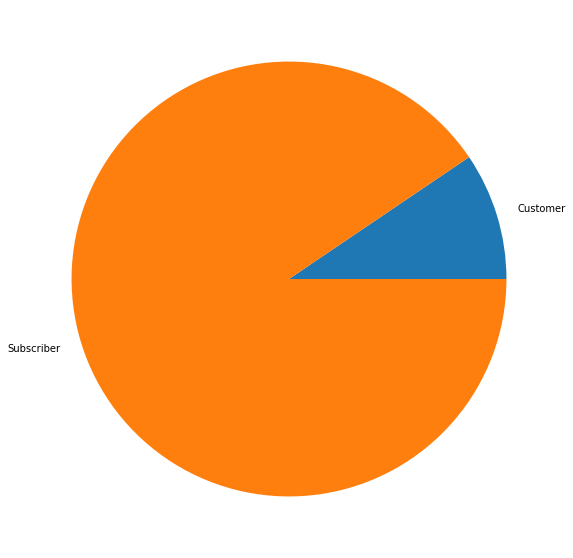

In [11]:
x=df.groupby('user_type').size()
plt.pie(x,labels=x.index);

#### Most of the users are subscribers

### user age

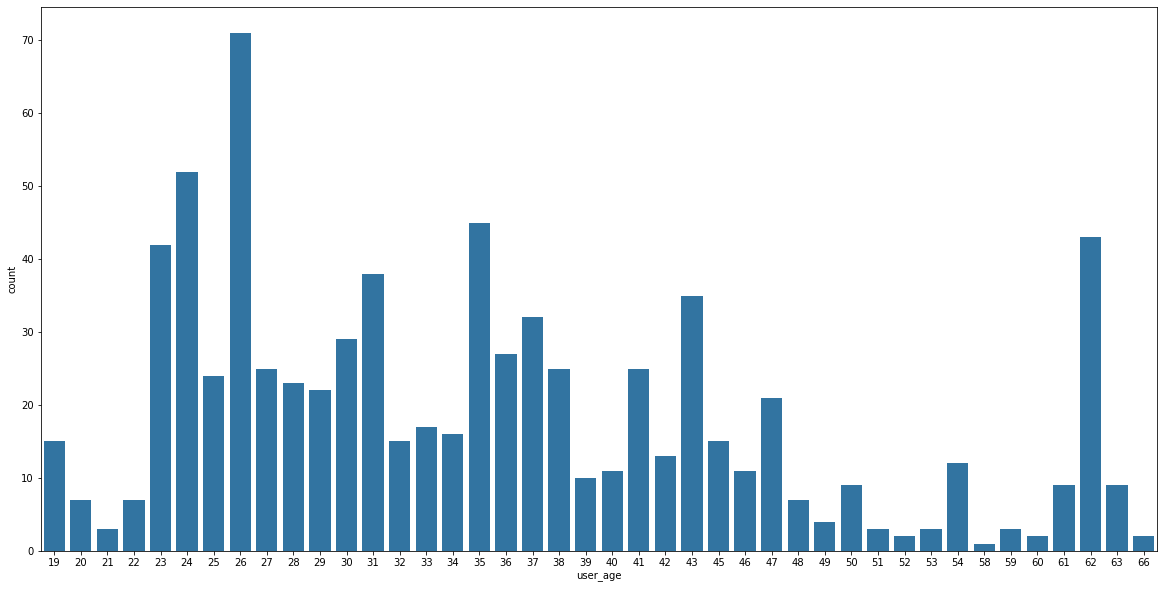

In [12]:
sns.countplot(data=df_unpop,x='user_age',  color=co);

#### the distribution has many peaks with the biggest ones at 26, 24, 35, 62, and 23

## Bivariate Exploration



### start renting time vs ride Duration

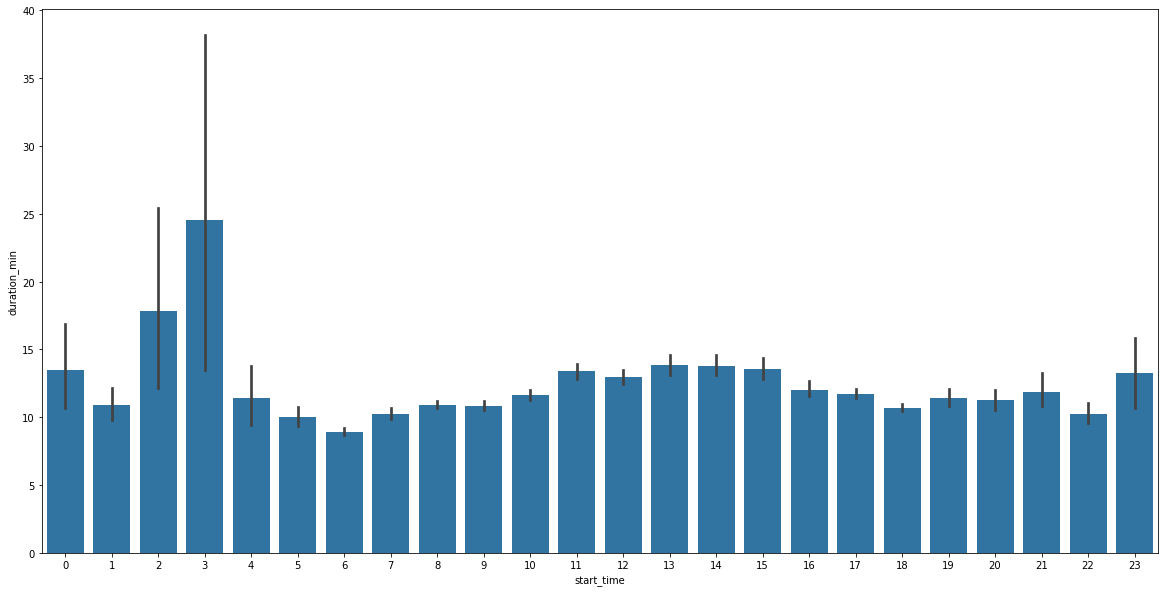

In [13]:
sns.barplot(data=df,x=df['start_time'].apply(lambda x:x.hour),y='duration_min',color=co);

#### the mean duration for all starting hours is approx. between 13 to 20 mins while having one peak at starting hour 3 which might mean that some people renting bike at this early time might tend to rent for alonger time (maybe the whole day)

### start renting time vs end  time

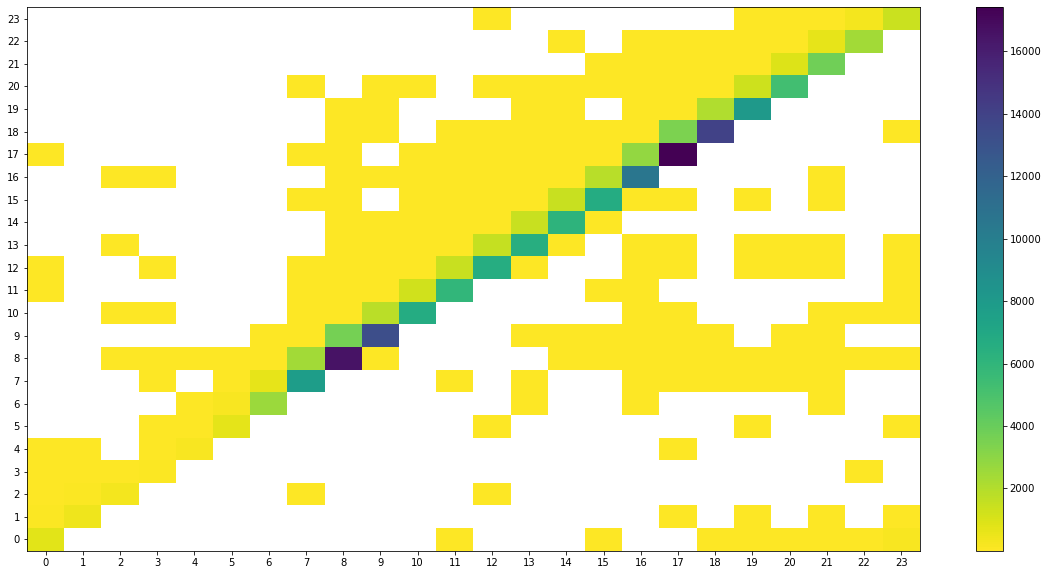

In [14]:
bins=np.arange(0,25,1)
plt.hist2d(data=df,x=df['start_time'].apply(lambda x:x.hour),y=df['end_time'].apply(lambda x:x.hour),
          cmin=0.5,cmap='viridis_r',bins=(bins,bins));
plt.colorbar();
plt.xticks(bins[:-1]+.5,bins[:-1]);
plt.yticks(bins[:-1]+.5,bins[:-1]);

#### this plot of starting time vs end time with the highest density on the diagnol shows that most of the rides are one hour are less

### User age vs start renting time

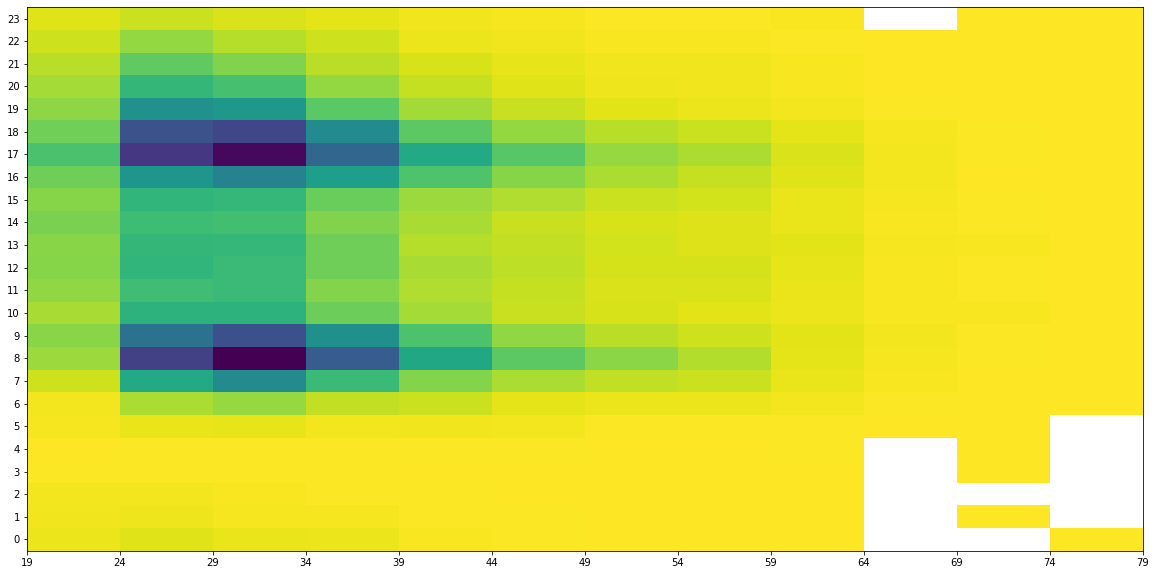

In [15]:
ybins=np.arange(0,25,1)
xbins=np.arange(19,80,5)
plt.hist2d(data=df,x=df['user_age'],y=df['start_time'].apply(lambda x:x.hour),
          cmin=0.5,cmap='viridis_r',bins=(xbins,ybins));
plt.xticks(xbins,xbins);
plt.yticks(ybins[:-1]+0.5,ybins[:-1]);

#### this plot of age aginst starting hour of renting shows that most users are in the 20's and 30's and the most common hours for them are between 6->9 in the morning and 16->19 in the evening which make sense as those are the most common starting and ending times of working hours

### User Type vs Ride duration

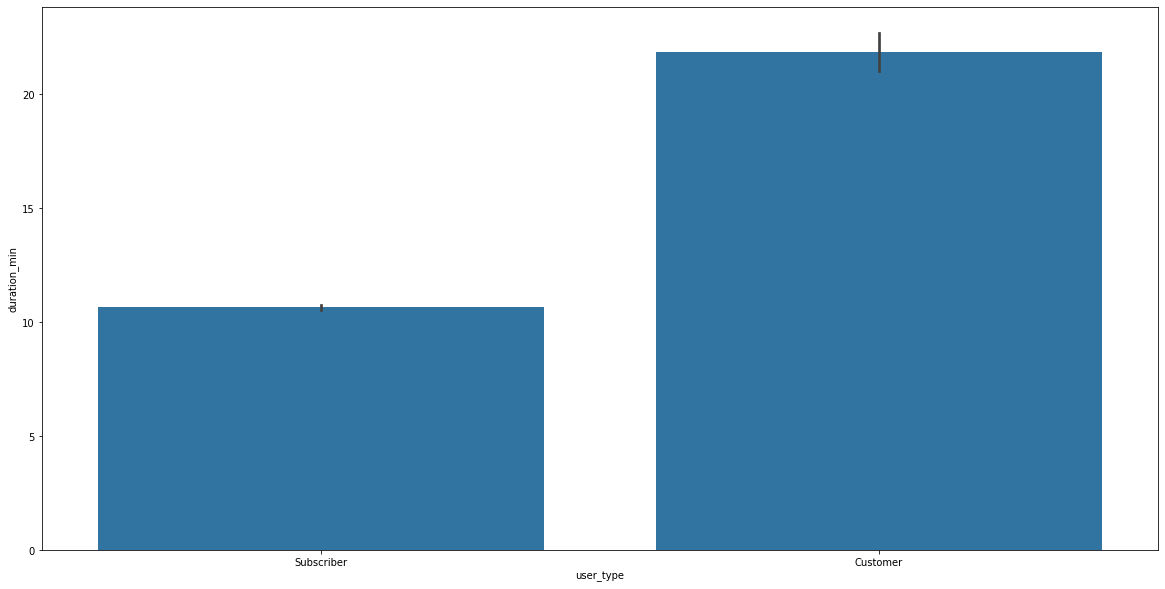

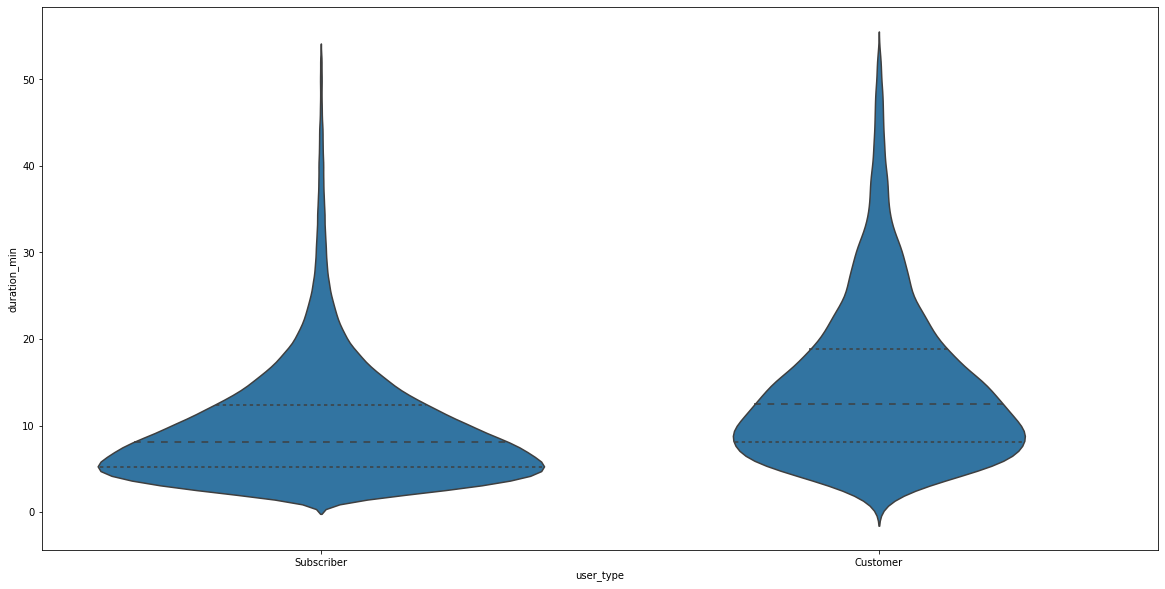

In [16]:
sns.barplot(data=df,x='user_type',y='duration_min',color=co,order=['Subscriber','Customer']);
plt.show()
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.99)]### User age vs start renting time
sns.violinplot(data=df1,x='user_type',y='duration_min',color=co,inner='quartile');

#### the previous plots shows that on average subscribers has shorter rides than customer which might mean that subscriber use the bike as their main transportation for work with shorter rider while customers might rent bikes for fun which takes longer than a regular work commute ride 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Trip duration vs Start renting time by Menmber gender

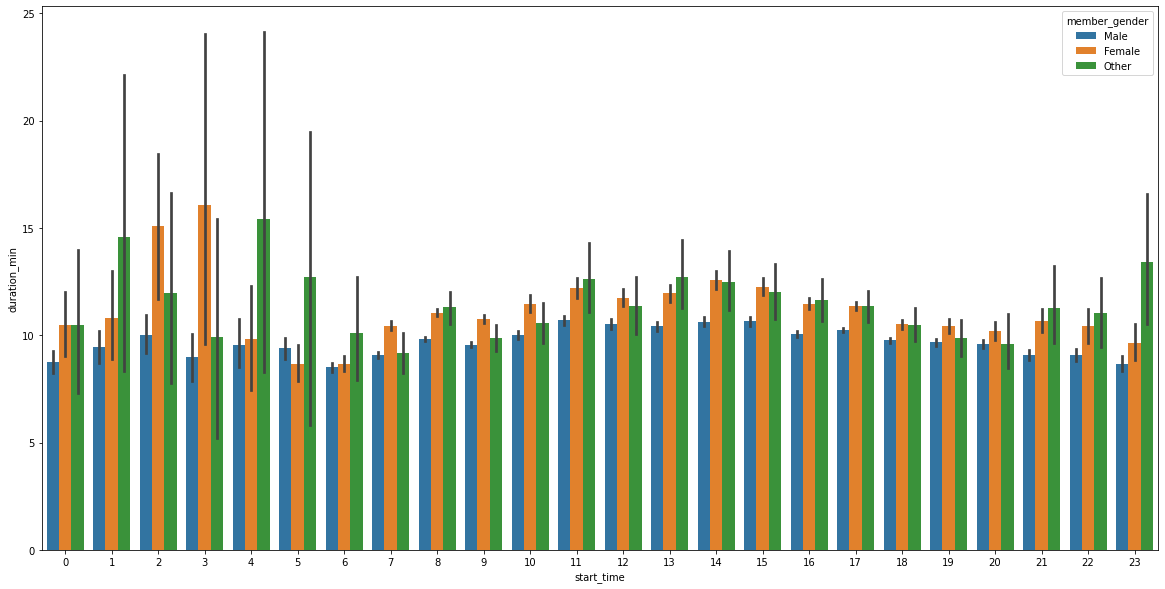

In [17]:
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.99)]
sns.barplot(data=df1,x=df['start_time'].apply(lambda x:x.hour),y='duration_min',hue='member_gender');

#### for most of the day hours females seems to have more trip durations than males and others(which might be users not decalring their gender) have more durations than both males and females 

### Trip duration vs user_type time by Menmber gender

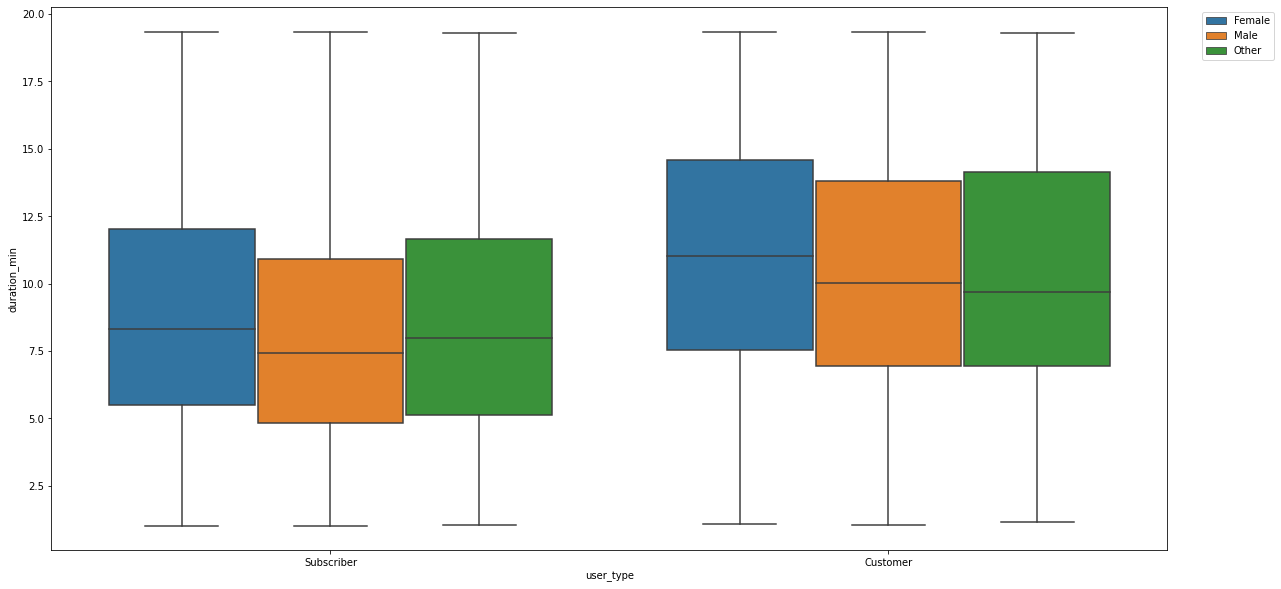

In [18]:
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.9)]
sns.boxplot(data=df1,x='user_type',y='duration_min',hue='member_gender')
plt.legend( bbox_to_anchor=(1.1, 1));

#### again another proof that customers tend to have longer trips than subscribers and females also tend to have the longer trips as well

### most popular stations vs user gender and type

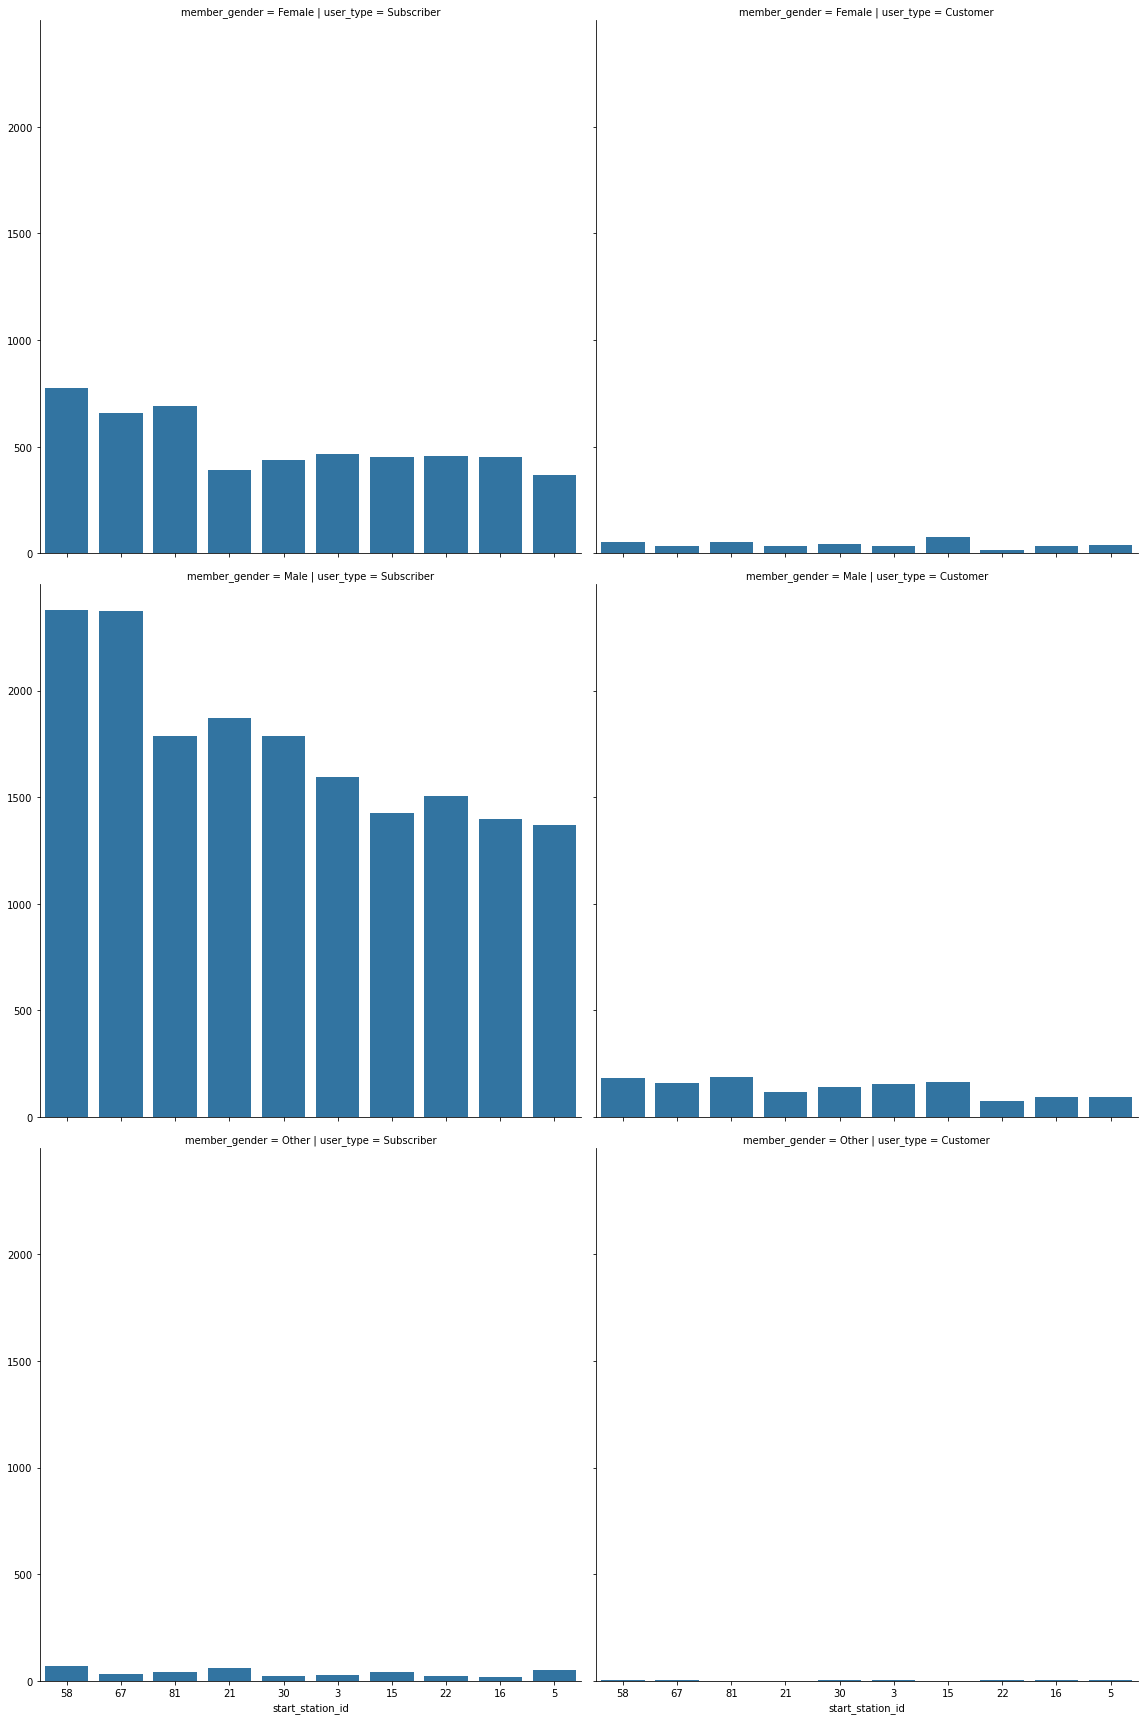

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_age,member_birth_year,member_gender,bike_share_for_all_trip
38,1066,17.766667,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,-122.426806,5938,Subscriber,27,1992.0,Female,No


In [19]:
df1=df[df['duration_min'] <= df['duration_min'].quantile(0.9)]
most_pop_stations=df1.groupby('start_station_id').size().sort_values(ascending=False).iloc[:10]
df_pop=df1[df1['start_station_id'].isin(most_pop_stations.index)]
g=sns.FacetGrid(data=df_pop,col='user_type',row='member_gender',height=8)
g.map(sns.countplot,'start_station_id',order=most_pop_stations.index)
plt.show()
df[df['start_station_id']==58].head(1)

#### we can see that the most popular station has the id of 58 and name of Market St at 10th St and the main population of user there are from subscribers from both genders males and females

# Summary

## Dataset
**The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**    
**Datasets columns:**    
{ duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender:, bike_share_for_all_trip }     

## Data wrangling and cleaning
**Steps:**   
* Drop records with any missing values.    
* Fix data types:     
  * change start_time and end_time columns from string to datetime type.    
  * change start_station_id and end_station_id from float to integer.    
* create new columns:    
  * create a new column for trip duration in minutes "duraion_min'.    
  * create a new column for the user age "user_age". 

## Summary of Findings
**Using visulaztions to find answers about the data, the following insights was found:**    
* The Trip duration follow a right skewed distribution and 90% of durations fall under 19.35 minutes.
* The busiest hours are 8 and 17 and the trips from 0 to 5 o'clock are much lower than other hours.    
* The most popular start station is 'market St at 10th St' and the least popular is '16th St Depot'.    
* The most popular end station is 'Townsend St at 4th St' the least popular is 'Williw St at Vine St'.    
* Most of the users are males.    
* Most of the users are subscribers.    
* Most of the users are in the 20's and 30's with peaks in ages of 26, 24, 35, 62, and 23.    
* the mean duration for all starting hours is approx. between 13 to 20 mins while having one peak at starting hour 3 which might mean that some people renting bike at this early time might tend to rent for alonger time (maybe the whole day).    
* Most of the rides are one hour are less.    
* On average subscribers has shorter rides than customer which might mean that subscriber use the bike as their main transportation for work with shorter rider while customers might rent bikes for fun which takes longer than a regular work commute ride.    
* Most of the day hours females seems to have more trip durations than males and others(which might be users not decalring their gender) have more durations than both males and females.    
* The most popular station has the id of 58 and name of Market St at 10th St and the main population of user there are from subscribers from both genders males and females